In [20]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import plotly.express as px
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)


In [53]:
!pip install --upgrade scikit-learn

     |████████████████████████████████| 23.2 MB 1.6 MB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


In [21]:
data = pd.read_csv('/content/Clustering.csv')
data.head()

CUST_ID      BALANCE  ...  PRC_FULL_PAYMENT  TENURE
0  C10001    40.900749  ...          0.000000      12
1  C10002  3202.467416  ...          0.222222      12
2  C10003  2495.148862  ...          0.000000      12
3  C10004  1666.670542  ...          0.000000      12
4  C10005   817.714335  ...          0.000000      12

[5 rows x 18 columns]

* CUSTID : Identification of Credit Card holder (Categorical)
* BALANCE : Balance amount left in their account to make purchases
* BALANCEFREQUENCY : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
* PURCHASES : Amount of purchases made from account
* ONEOFFPURCHASES : Maximum purchase amount done in one-go
* INSTALLMENTSPURCHASES : Amount of purchase done in installment
* CASHADVANCE : Cash in advance given by the user
* PURCHASESFREQUENCY : How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
* ONEOFFPURCHASESFREQUENCY : How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
* PURCHASESINSTALLMENTSFREQUENCY : How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
* CASHADVANCEFREQUENCY : How frequently the cash in advance being paid
* CASHADVANCETRX : Number of Transactions made with "Cash in Advanced"
* PURCHASESTRX : Numbe of purchase transactions made
* CREDITLIMIT : Limit of Credit Card for user
* PAYMENTS : Amount of Payment done by user
* MINIMUM_PAYMENTS : Minimum amount of payments made by user
* PRCFULLPAYMENT : Percent of full payment paid by user
* TENURE : Tenure of credit card service for user

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [23]:
numerical_features = ['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE']

# EDA

In [24]:
def plot_distribution(feature):
    sns.displot(x=feature, data=data, kde=True, color='#244747');
    plt.figtext(0.2, 1, '%s Distribution'%feature, fontfamily='serif', fontsize=17, fontweight='bold');

def plot_num_cat(feature, target, figsize=None):
    fig = plt.figure(figsize=(15,6))

    for value in data[target].unique():
        sns.kdeplot(data[data[target]==value][feature])

    fig.legend(labels=data[target].unique())
    plt.title('{} distribution based on {}'.format(feature, target))
    plt.show()
    
def plot_num_num(feature, target):
    sns.regplot(x=feature, y=target, data=data, color='#244747')
    plt.show()
    
def plot_cat_cat(feature, target):
    plot_data = data.groupby([feature, target])[feature].agg({'count'}).reset_index()

    fig = px.sunburst(plot_data, path=[feature, target], values='count', #color_continuous_scale='gray', color=feature, 
                      title='Affect of {} on Customer {}'.format(feature, target), width = 600, height = 600)
    
    fig.update_layout(plot_bgcolor='white', title_font_family='Calibri Black', title_font_color='#221f1f', 
                      title_font_size=22, title_x=0.5)
    fig.update_traces(textinfo = 'label + percent parent')
    fig.show()

In [25]:
# data is highly skewed and hence taking log transformation
df = data.copy()
skewed_features = ['BALANCE', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS']
#'PURCHASES_INSTALLMENTS_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'BALANCE_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 
#'PRC_FULL_PAYMENT', 'TENURE', 'cluster']\
for feature in skewed_features:
    data[feature] = np.log(1+df[feature])

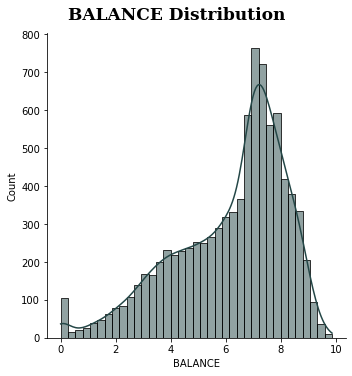

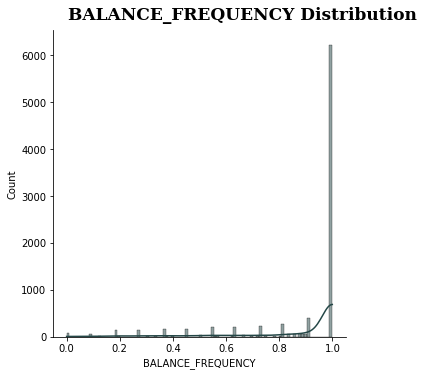

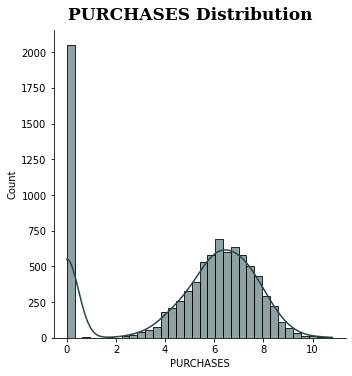

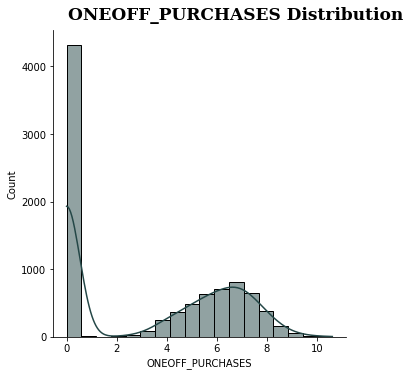

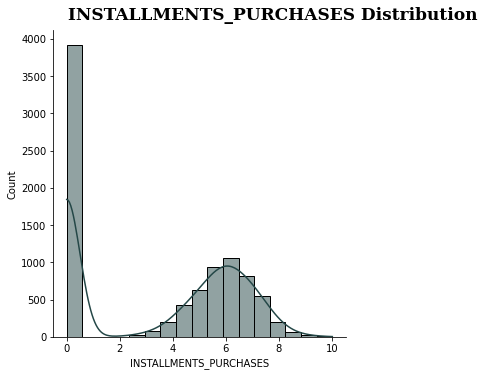

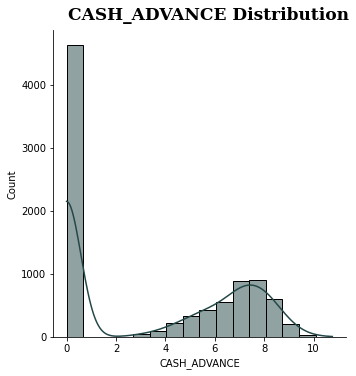

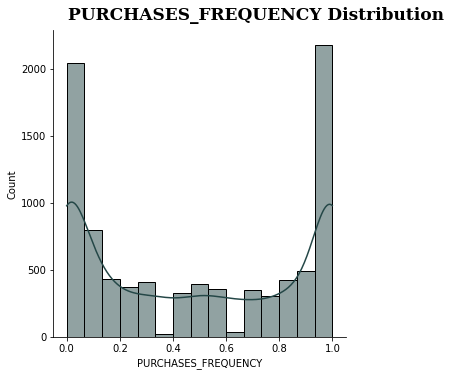

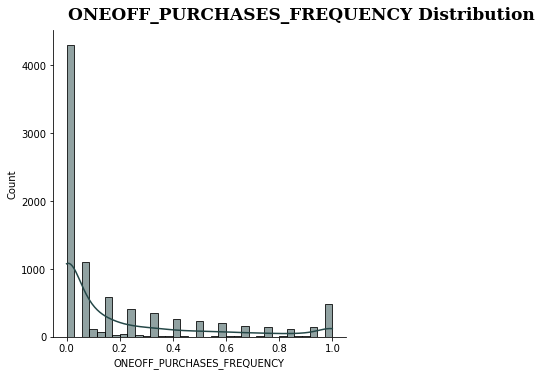

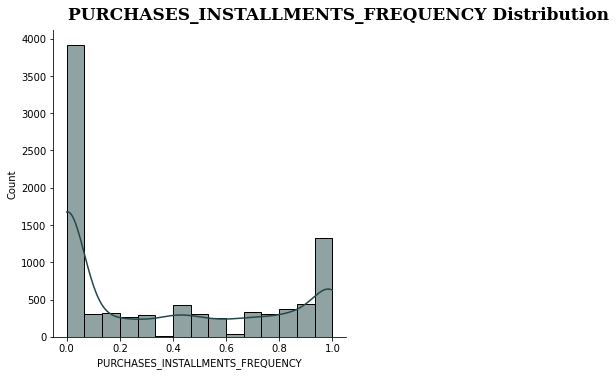

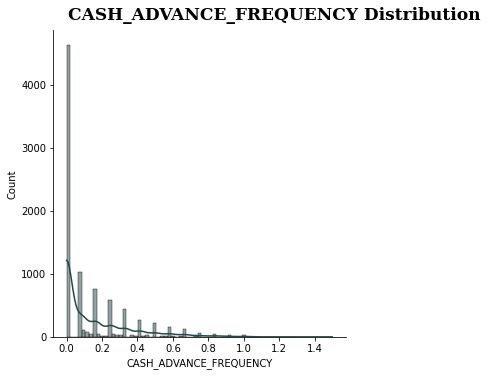

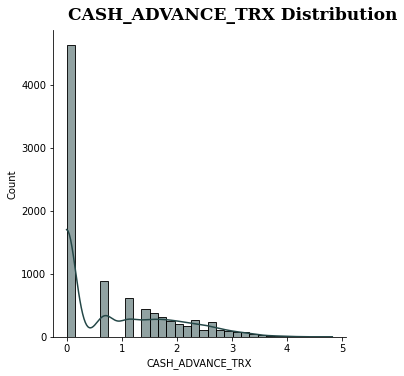

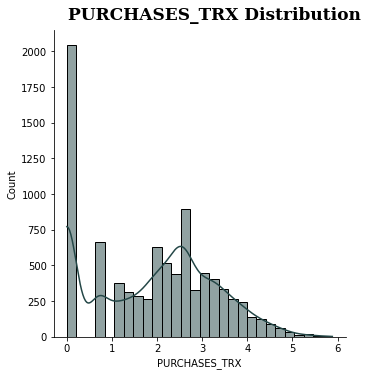

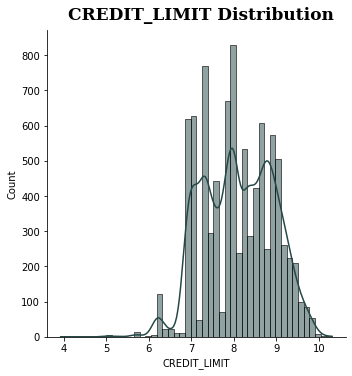

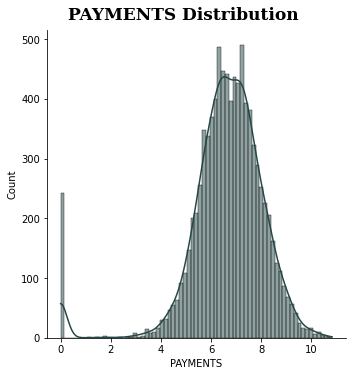

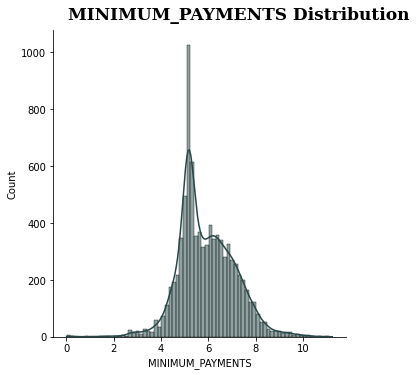

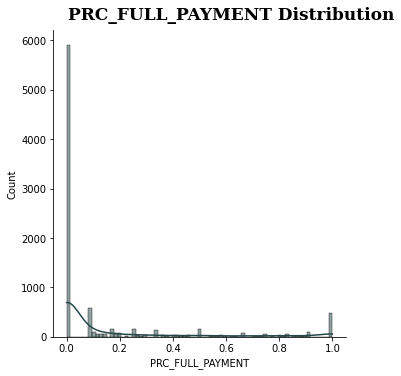

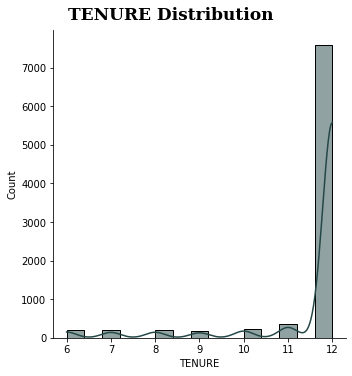

In [26]:
# looking at the distribution of data
for feature in numerical_features:
    plot_distribution(feature)

# CORRELATION

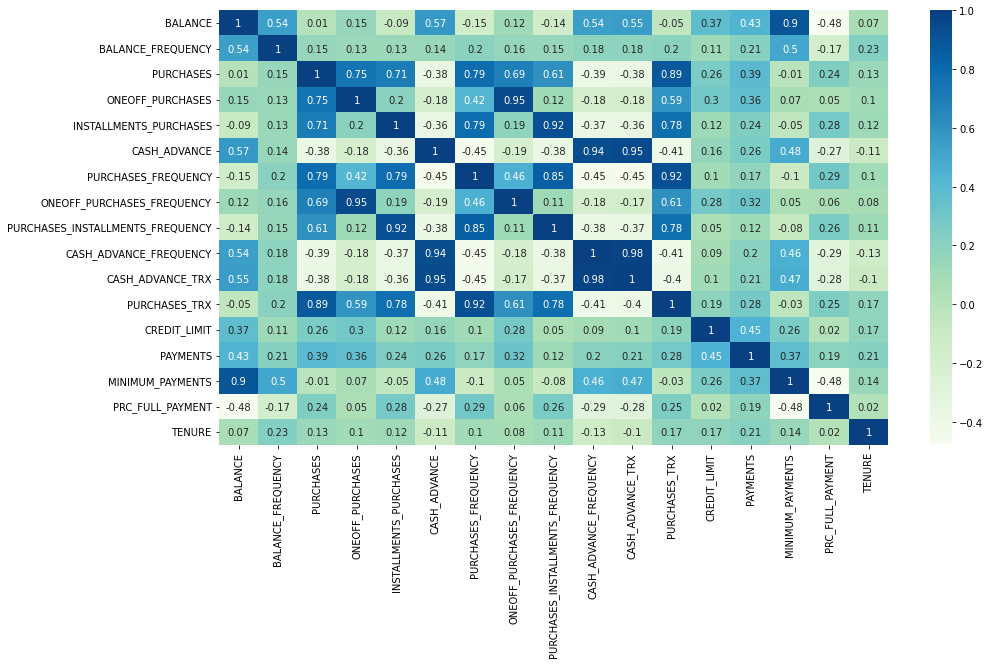

In [27]:
plt.figure(figsize=(15, 8))
sns.heatmap(round(data[numerical_features].corr(method='spearman'), 2), 
            annot=True, mask=None, cmap='GnBu')
plt.show()

In [28]:
corr_mat = data[numerical_features].corr()
corr_mat = corr_mat.unstack()
corr_mat = corr_mat.sort_values(kind="quicksort").drop_duplicates()
corr_mat[corr_mat>0.5]

PURCHASES_FREQUENCY               ONEOFF_PURCHASES_FREQUENCY          0.501343
CASH_ADVANCE_TRX                  BALANCE                             0.504146
CASH_ADVANCE                      BALANCE                             0.521648
PURCHASES                         ONEOFF_PURCHASES_FREQUENCY          0.547315
ONEOFF_PURCHASES                  PURCHASES_TRX                       0.574393
PURCHASES                         PURCHASES_INSTALLMENTS_FREQUENCY    0.592411
ONEOFF_PURCHASES_FREQUENCY        PURCHASES_TRX                       0.608430
BALANCE                           BALANCE_FREQUENCY                   0.652592
PURCHASES                         ONEOFF_PURCHASES                    0.683510
                                  INSTALLMENTS_PURCHASES              0.685390
PURCHASES_INSTALLMENTS_FREQUENCY  PURCHASES_TRX                       0.759533
ONEOFF_PURCHASES                  ONEOFF_PURCHASES_FREQUENCY          0.769934
CASH_ADVANCE                      CASH_ADVANCE_FREQU

# Analyzing features using VIF

In [29]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [30]:
# Calculating VIF
vif = pd.DataFrame()
df = data.dropna()
vif["variables"] = [feature for feature in numerical_features if feature not in ['MINIMUM_PAYMENTS', 'CREDIT_LIMIT', 'PURCHASES_TRX',
                                                                                'BALANCE', 'PURCHASES_FREQUENCY', 'PAYMENTS',
                                                                                'PURCHASES', 'CASH_ADVANCE_TRX', 'BALANCE_FREQUENCY',
                                                                                'INSTALLMENTS_PURCHASES']]
vif["VIF"] = [variance_inflation_factor(df[vif['variables']].values, i) for i in range(len(vif["variables"]))]
print(vif)

                          variables       VIF
0                  ONEOFF_PURCHASES  5.079932
1                      CASH_ADVANCE  5.174950
2        ONEOFF_PURCHASES_FREQUENCY  3.795385
3  PURCHASES_INSTALLMENTS_FREQUENCY  2.178052
4            CASH_ADVANCE_FREQUENCY  3.652828
5                  PRC_FULL_PAYMENT  1.504504
6                            TENURE  5.415363


# Handling Missing Values

In [31]:
missingValueFeatures = pd.DataFrame({'missing %': data.isnull().sum()*100/len(data)})
missingValueFeatures[missingValueFeatures['missing %']>0]

missing %
CREDIT_LIMIT       0.011173
MINIMUM_PAYMENTS   3.497207

|COLUMN|CORRELATION|
|---|---|
|CREDIT_LIMIT|NA|
|MINIMUM_PAYMENTS|BALANCE|

**We can impute missing values as per the correlation table above.**

In [32]:
# Imputing CREDIT_LIMIT & MINIMUM_PAYMENTS as per BALANCE
print('Before Imputation:')
print(data[['CREDIT_LIMIT', 'MINIMUM_PAYMENTS']].describe().T)

data.sort_values(by='BALANCE', inplace=True)
# now use backfill method to replace
data['CREDIT_LIMIT'].fillna(data['CREDIT_LIMIT'].mean(), inplace=True)
data['MINIMUM_PAYMENTS'].fillna(method='bfill', inplace=True)

print('\nAfter Imputation:')
print(data[['CREDIT_LIMIT', 'MINIMUM_PAYMENTS']].describe().T)

Before Imputation:
                   count      mean       std  ...       50%       75%        max
CREDIT_LIMIT      8949.0  8.094835  0.819674  ...  8.006701  8.779711  10.308986
MINIMUM_PAYMENTS  8637.0  5.922195  1.190493  ...  5.747301  6.717182  11.243832

[2 rows x 8 columns]

After Imputation:
                   count      mean       std  ...       50%       75%        max
CREDIT_LIMIT      8950.0  8.094835  0.819628  ...  8.006701  8.779711  10.308986
MINIMUM_PAYMENTS  8950.0  5.873356  1.232199  ...  5.698969  6.682048  11.243832

[2 rows x 8 columns]


# Looking at Outliers

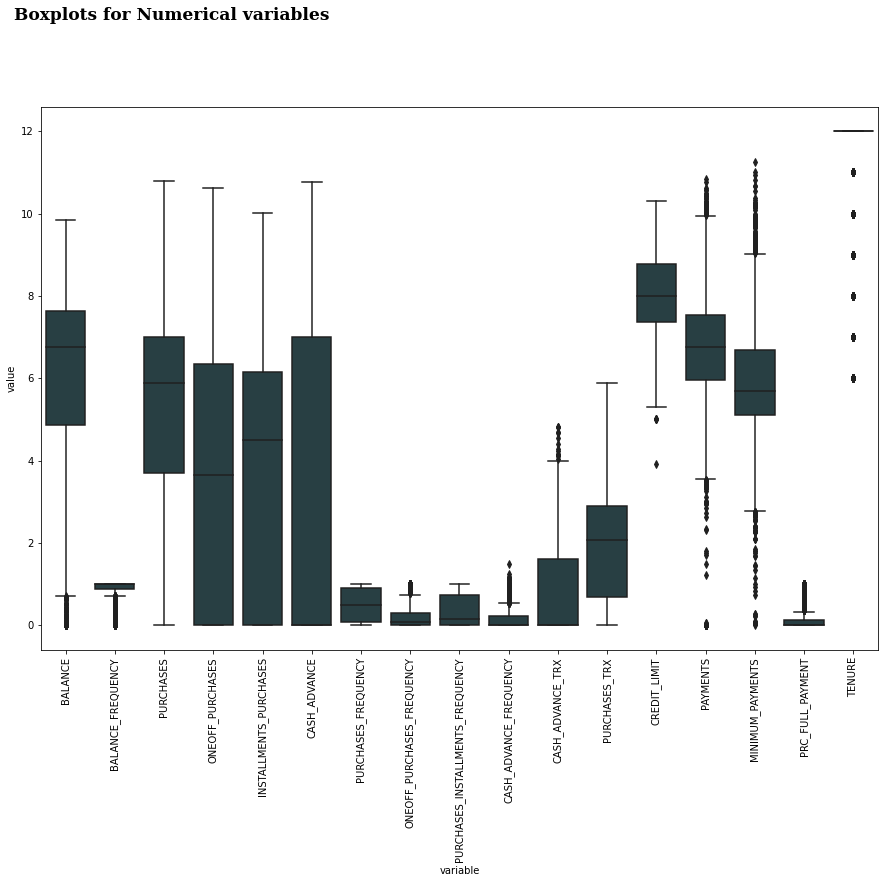

In [33]:
NumericData = data[[feature for feature in numerical_features if feature not in []]]
NumericMelt = NumericData.melt()
plt.figure(figsize=(15,10))
plt.figtext(0.1, 1, "Boxplots for Numerical variables", fontfamily='serif', fontsize=17, fontweight='bold')
bp = sns.boxplot(x='variable', y='value', data=NumericMelt, palette=['#244247']*len(numerical_features))
bp.set_xticklabels(bp.get_xticklabels(), rotation=90)
plt.show()

In [34]:
# Percentage of outliers present in each variable
outlier_percentage = {}
for feature in numerical_features:
    tempData = data.sort_values(by=feature)[feature]
    Q1, Q3 = tempData.quantile([0.25, 0.75])
    IQR = Q3 - Q1
    Lower_range = Q1 - (1.5 * IQR)
    Upper_range = Q3 + (1.5 * IQR)
    outlier_percentage[feature] = round((((tempData<(Q1 - 1.5 * IQR)) | (tempData>(Q3 + 1.5 * IQR))).sum()/tempData.shape[0])*100,2)
outlier_percentage

{'BALANCE': 1.47,
 'BALANCE_FREQUENCY': 16.68,
 'CASH_ADVANCE': 0.0,
 'CASH_ADVANCE_FREQUENCY': 5.87,
 'CASH_ADVANCE_TRX': 0.17,
 'CREDIT_LIMIT': 0.07,
 'INSTALLMENTS_PURCHASES': 0.0,
 'MINIMUM_PAYMENTS': 2.25,
 'ONEOFF_PURCHASES': 0.0,
 'ONEOFF_PURCHASES_FREQUENCY': 8.74,
 'PAYMENTS': 3.55,
 'PRC_FULL_PAYMENT': 16.47,
 'PURCHASES': 0.0,
 'PURCHASES_FREQUENCY': 0.0,
 'PURCHASES_INSTALLMENTS_FREQUENCY': 0.0,
 'PURCHASES_TRX': 0.0,
 'TENURE': 15.26}

Let's take log transformation of all features with high outlier values and see how it looks

# Traning ML Model

In [35]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering 
from sklearn.mixture import GaussianMixture
from sklearn.cluster import SpectralClustering 
from sklearn.cluster import DBSCAN

# Model 1: KMeans

In [36]:
feature_cols = [feature for feature in data.columns if feature not in(['CUST_ID'])]
train_data = data.copy()[feature_cols]
print('features used- ', feature_cols)

features used-  ['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE']


In [37]:
# rescaling data
scale = StandardScaler()
train_data = scale.fit_transform(train_data)

### Using ELBOW Method to figure out number of clusters

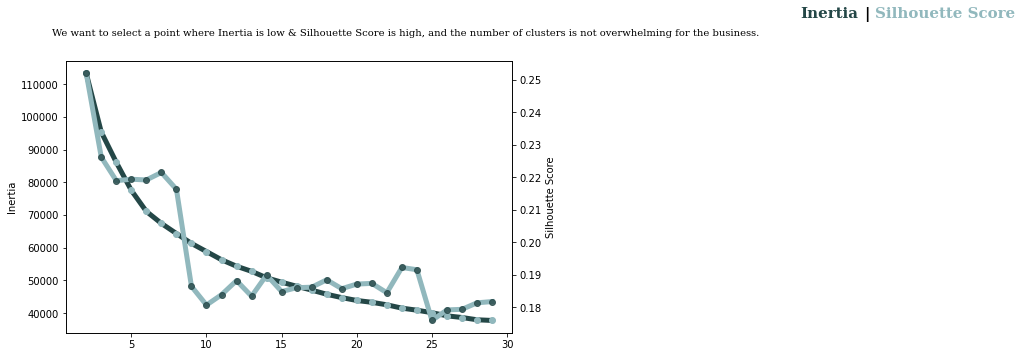

In [38]:
inertia=[]
silhouetteScore = []
n_clusters = 30
for i in range(2, n_clusters):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)
    kmeans.fit(train_data)
    inertia.append(kmeans.inertia_)
    silhouetteScore.append(silhouette_score(train_data, kmeans.predict(train_data)))

fig, ax1 = plt.subplots(figsize=(8, 5))
#fig.text(0.1, 1, 'Skipping ', fontfamily='serif', fontsize=12, fontweight='bold')
fig.text(0.1, 0.95, 'We want to select a point where Inertia is low & Silhouette Score is high, and the number of clusters is not overwhelming for the business.',
         fontfamily='serif',fontsize=10)
fig.text(1.4, 1, 'Inertia', fontweight="bold", fontfamily='serif', fontsize=15, color='#244747')
fig.text(1.51, 1, "|", fontweight="bold", fontfamily='serif', fontsize=15, color='black')
fig.text(1.53, 1, 'Silhouette Score', fontweight="bold", fontfamily='serif', fontsize=15, color='#91b8bd')

ax1.plot(range(2, n_clusters), inertia, '-', color='#244747', linewidth=5)
ax1.plot(range(2, n_clusters), inertia, 'o', color='#91b8bd')
ax1.set_ylabel('Inertia')

ax2 = ax1.twinx()
ax2.plot(range(2, n_clusters), silhouetteScore, '-', color='#91b8bd', linewidth=5)
ax2.plot(range(2, n_clusters), silhouetteScore, 'o', color='#244747', alpha=0.8)
ax2.set_ylabel('Silhouette Score')

plt.xlabel('Number of clusters')
plt.show()

Based on Silhoutte Score and Elbow, we can consider clusters to be 7

In [39]:
model = KMeans(n_clusters=7, init='k-means++', random_state=0, algorithm='elkan')
y = model.fit_predict(train_data)

## Visualizing the clusters using PCA

### 2D Plot

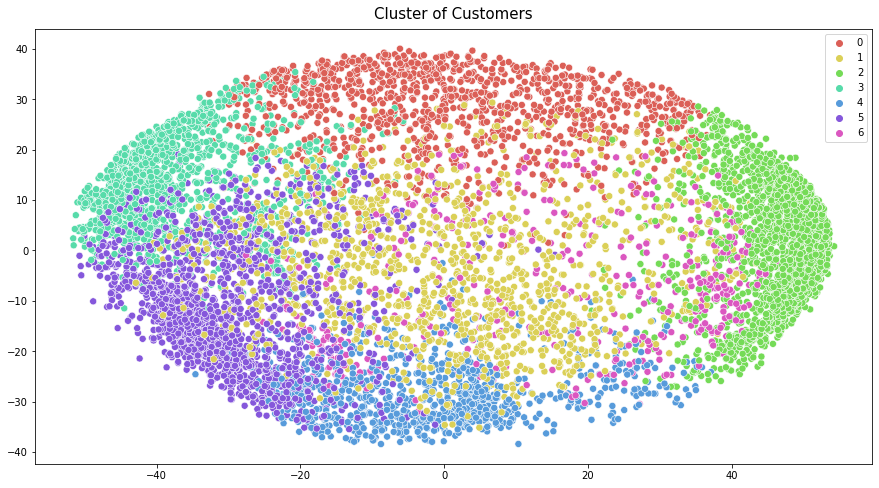

In [40]:
dist = 1-cosine_similarity(train_data)

pca = PCA(2)
pca.fit(dist)
X_PCA = pca.transform(dist)

# Visualizing all the clusters 
plt.figure(figsize=(15,8))
sns.scatterplot(x=X_PCA[:, 0], y=X_PCA[:, 1], 
                hue=y, palette=sns.color_palette('hls', model.cluster_centers_.shape[0]), s=50)
plt.title('Cluster of Customers', size=15, pad=10)
plt.legend(loc=0, bbox_to_anchor=[1,1])
plt.show()

### 3D Plot

In [41]:
dist = 1-cosine_similarity(train_data)

pca = PCA(3)
pca.fit(dist)
X_PCA = pca.transform(dist)

# Visualizing all the clusters 
fig = px.scatter_3d(x=X_PCA[:,0], y=X_PCA[:,1], z=X_PCA[:,2],
                    color=y, opacity=0.8)
fig.show()

# Model Interpretation

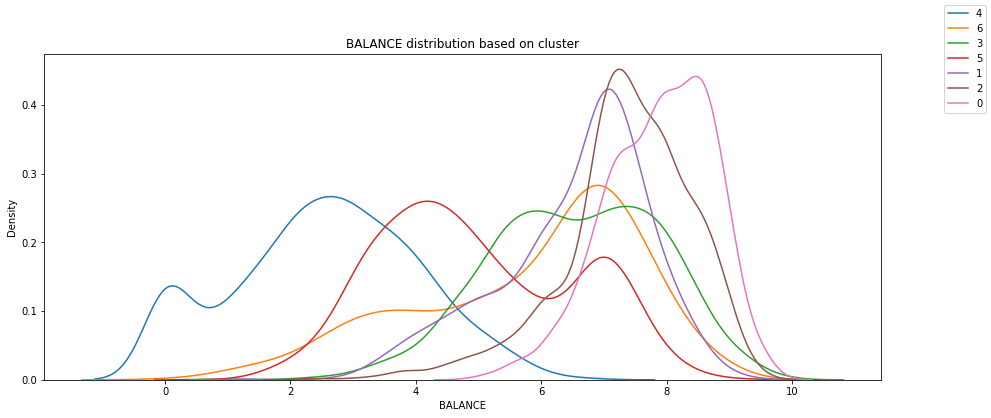

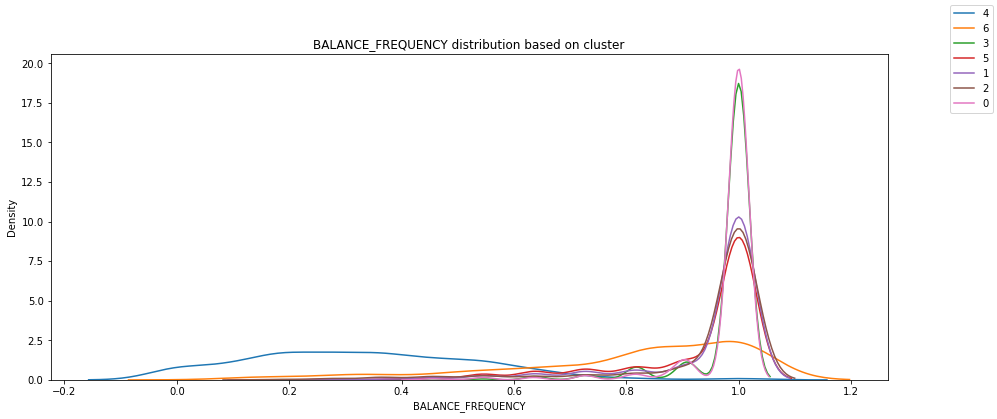

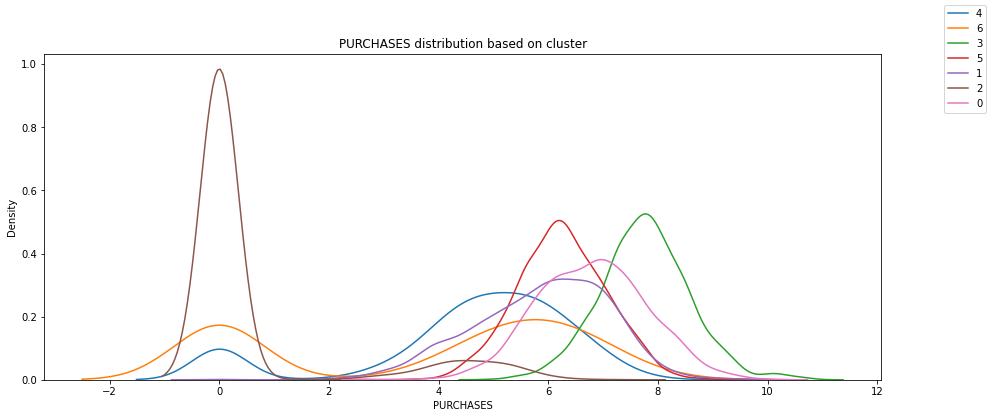

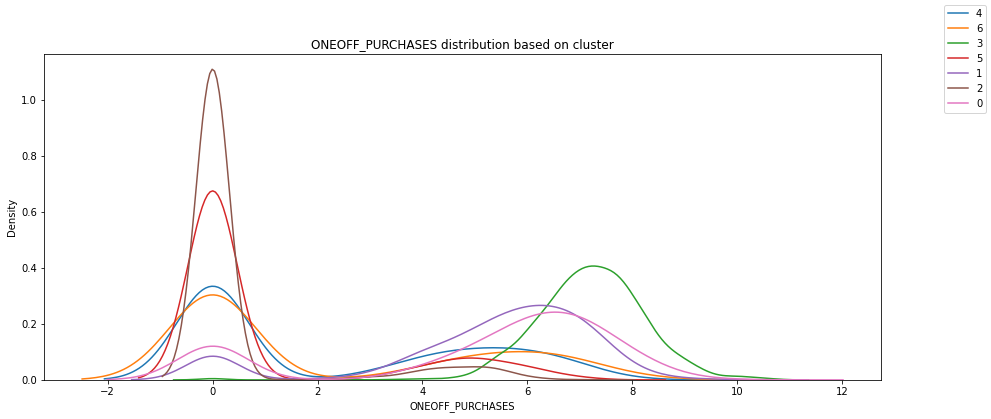

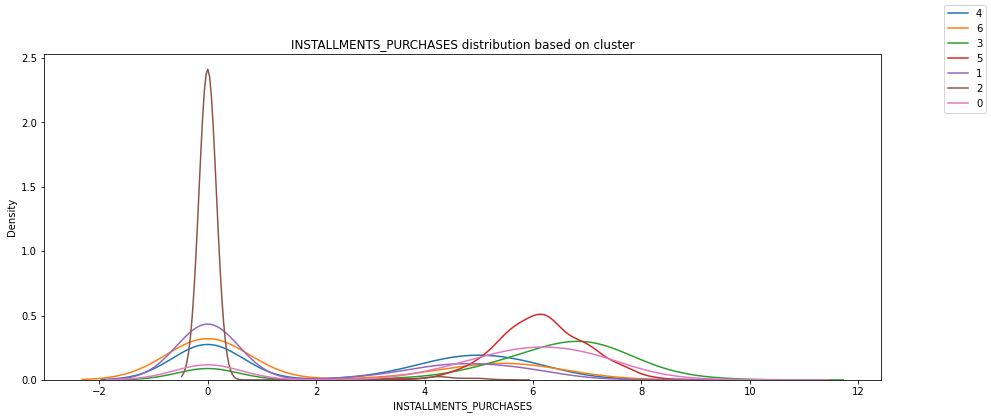

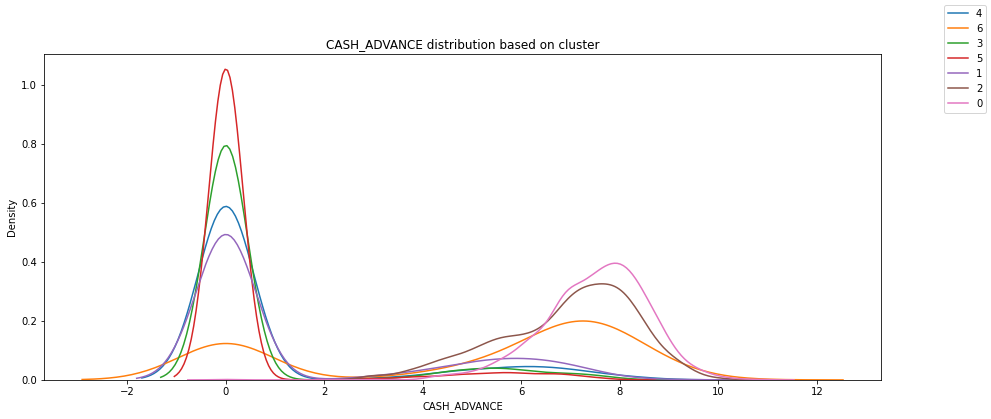

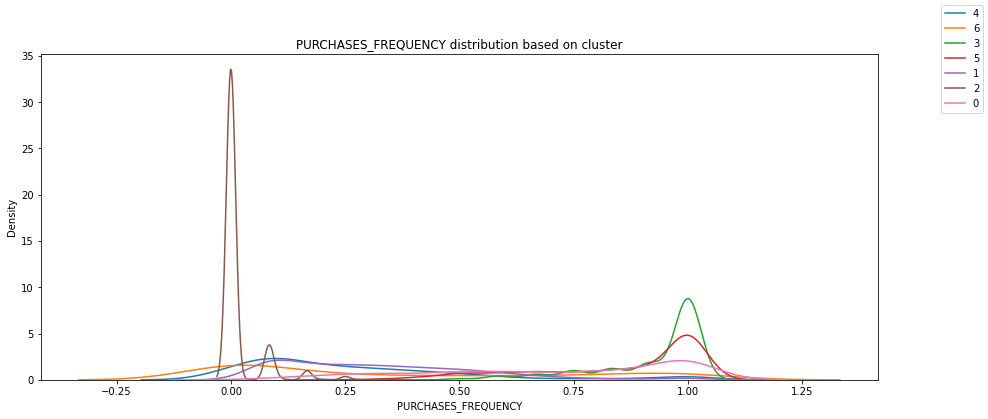

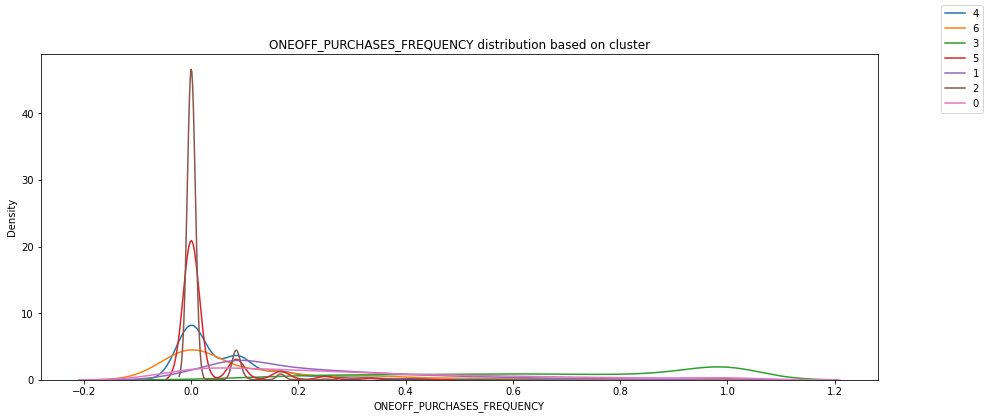

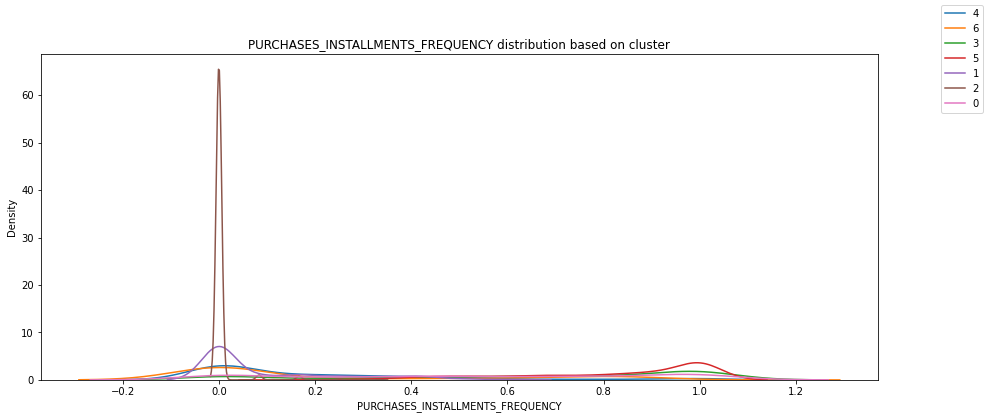

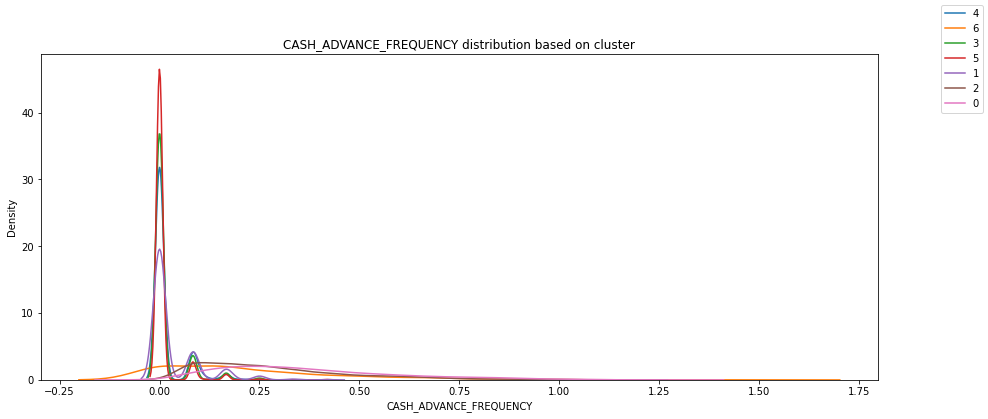

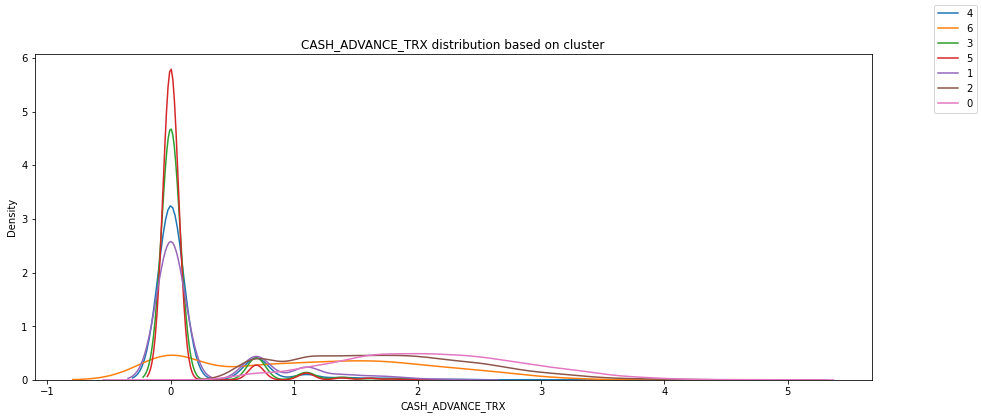

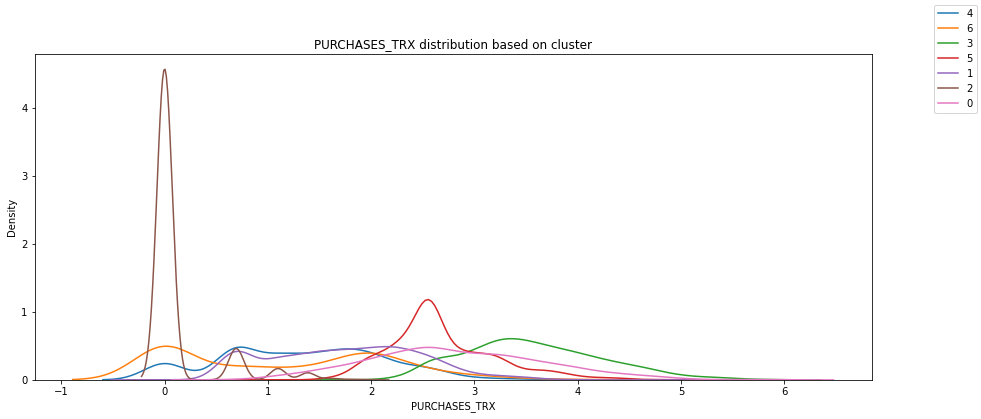

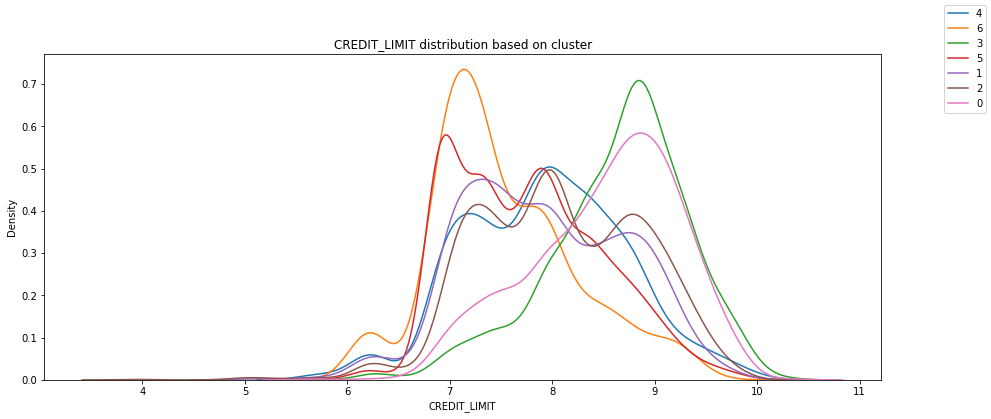

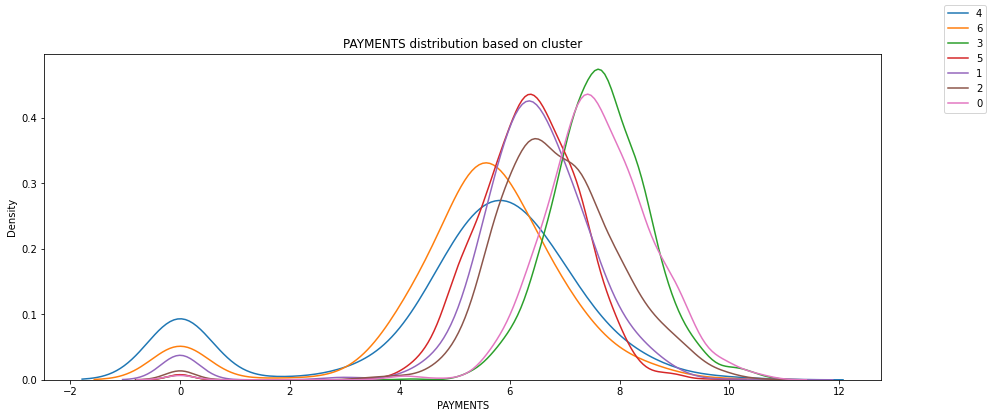

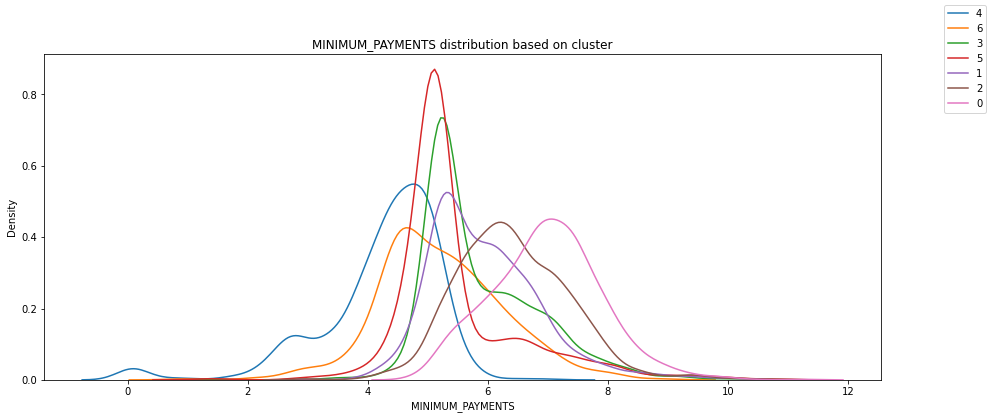

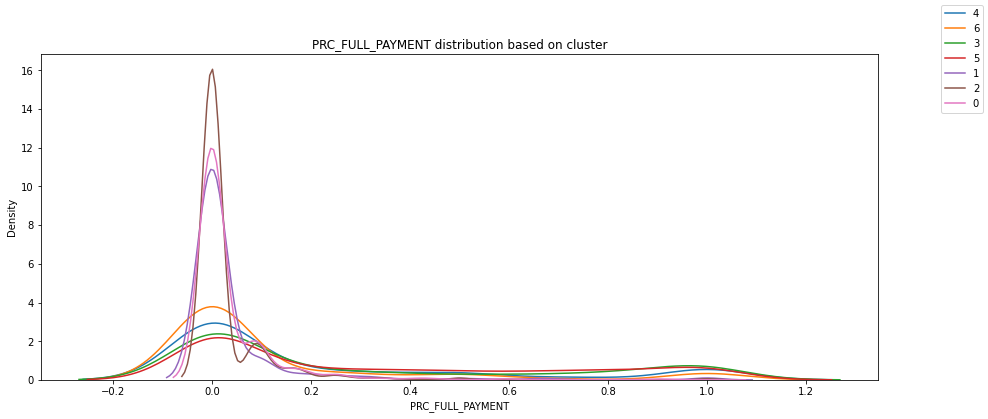

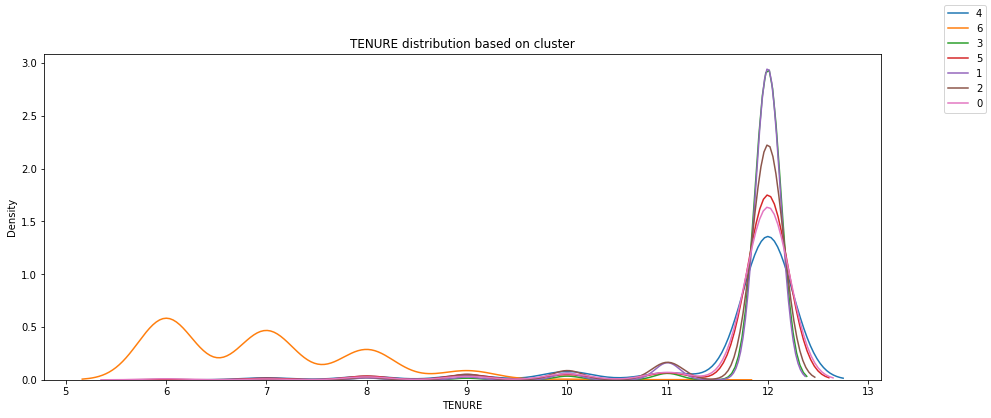

In [42]:
data['cluster'] = y
for feature in numerical_features:
    plot_num_cat(feature, 'cluster')

**Observations-**
May be in some other version

# Model 2: Hierarchical Clustering

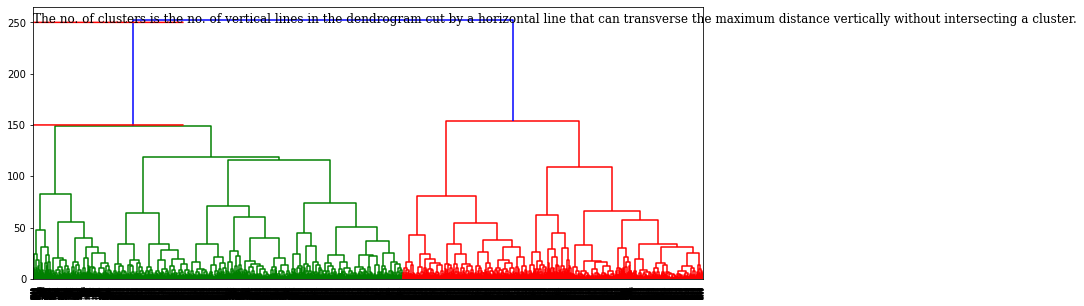

In [43]:
plt.figure(figsize = (12, 5))
plt.text(5, 250, 'The no. of clusters is the no. of vertical lines in the dendrogram cut by a horizontal line that can transverse the maximum distance vertically without intersecting a cluster.',
         fontfamily='serif',fontsize=12)
dendo = dendrogram(linkage(train_data, method='ward'))
plt.plot([250]*20000, color='r')
plt.plot([150]*20000, color='r')
plt.show()

In [44]:
model = AgglomerativeClustering(n_clusters=7, affinity='euclidean', linkage='ward')
y = model.fit_predict(train_data)

## Visualizing the clusters using PCA

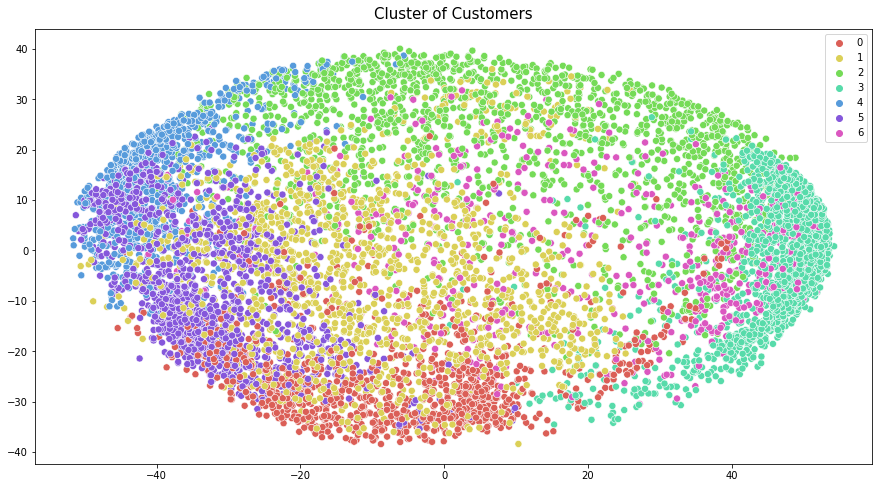

In [45]:
dist = 1-cosine_similarity(train_data)

pca = PCA(2)
pca.fit(dist)
X_PCA = pca.transform(dist)

# Visualizing all the clusters 
plt.figure(figsize=(15,8))
sns.scatterplot(x=X_PCA[:, 0], y=X_PCA[:, 1], 
                hue=y, palette=sns.color_palette('hls', len(np.unique(y))), s=50)
plt.title('Cluster of Customers', size=15, pad=10)
plt.legend(loc=0, bbox_to_anchor=[1,1])
plt.show()

# Model 3: Gaussian Mixture

In [46]:
# Number of clusters is determined using elbow method above
model = GaussianMixture(n_components=7)
y = model.fit_predict(train_data)

## Visualizing the clusters using PCA

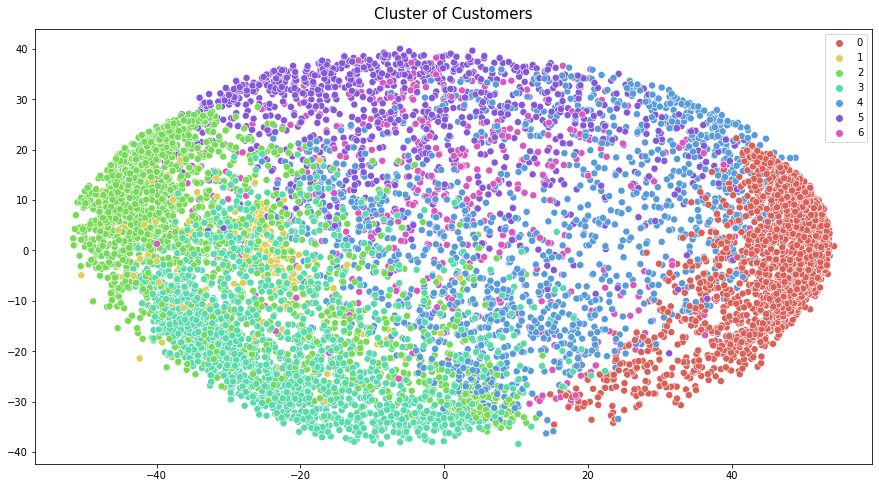

In [47]:
dist = 1-cosine_similarity(train_data)

pca = PCA(2)
pca.fit(dist)
X_PCA = pca.transform(dist)

# Visualizing all the clusters 
plt.figure(figsize=(15,8))
sns.scatterplot(x=X_PCA[:, 0], y=X_PCA[:, 1], 
                hue=y, palette=sns.color_palette('hls', len(np.unique(y))), s=50)
plt.title('Cluster of Customers', size=15, pad=10)
plt.legend(loc=0, bbox_to_anchor=[1,1])
plt.show()

# Model 4: Spectral Clustering

In [48]:
# Building the clustering model 
model = SpectralClustering(n_clusters=7, affinity='rbf') 
  
# Training the model and Storing the predicted cluster labels 
y = model.fit_predict(train_data)

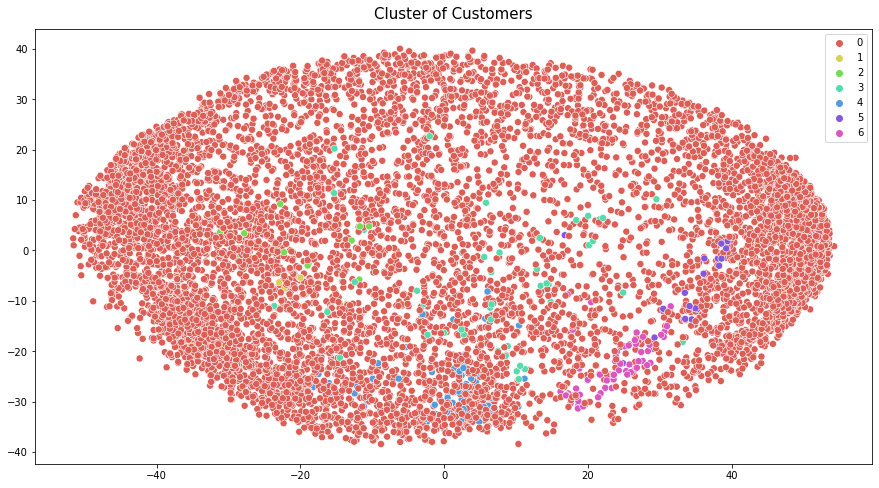

In [49]:
dist = 1-cosine_similarity(train_data)

pca = PCA(2)
pca.fit(dist)
X_PCA = pca.transform(dist)

# Visualizing all the clusters 
plt.figure(figsize=(15,8))
sns.scatterplot(x=X_PCA[:, 0], y=X_PCA[:, 1], 
                hue=y, palette=sns.color_palette('hls', len(np.unique(y))), s=50)
plt.title('Cluster of Customers', size=15, pad=10)
plt.legend(loc=0, bbox_to_anchor=[1,1])
plt.show()

# Model 5: DBSCAN

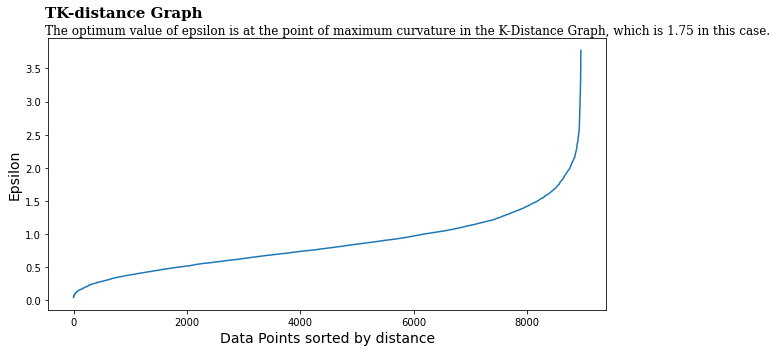

In [50]:
from sklearn.neighbors import NearestNeighbors
# finding nearest points distance for every row in data
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(train_data)
distances, indices = nbrs.kneighbors(train_data)

# Plotting K-distance Graph
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(10,5))
p=max(distances)+0.5
plt.text(-500, p, 'TK-distance Graph', fontfamily='serif', fontsize=15, fontweight='bold')
plt.text(-500, p-0.25, 'The optimum value of epsilon is at the point of maximum curvature in the K-Distance Graph, which is 1.75 in this case.',
        fontfamily='serif', fontsize=12)
plt.plot(distances)
plt.xlabel('Data Points sorted by distance', fontsize=14)
plt.ylabel('Epsilon', fontsize=14)
plt.show()

In [51]:
# Building the clustering model 
model = DBSCAN(eps=1.75, min_samples=10) 
  
# Training the model and Storing the predicted cluster labels 
y = model.fit_predict(train_data)

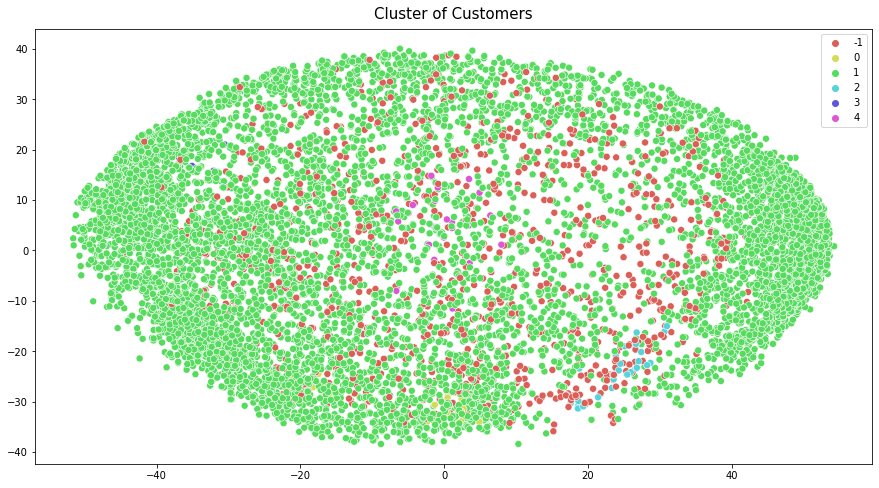

In [52]:
dist = 1-cosine_similarity(train_data)

pca = PCA(2)
pca.fit(dist)
X_PCA = pca.transform(dist)

# Visualizing all the clusters 
plt.figure(figsize=(15,8))
sns.scatterplot(x=X_PCA[:, 0], y=X_PCA[:, 1], 
                hue=y, palette=sns.color_palette('hls', len(np.unique(y))), s=50)
plt.title('Cluster of Customers', size=15, pad=10)
plt.legend(loc=0, bbox_to_anchor=[1,1])
plt.show()